### Make data

In [182]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
plt.style.use('seaborn')

In [3]:
Data_wtemp_pop_gdp = pd.read_csv(r"D:\Semester 7\Machine Learning\Assignment\DataPoisson_wtemp_pop_gdp.csv")

In [244]:
Data_wtemp_pop_gdp.head()

,home_team,away_team,home_goals,away_goals,Total_Score_home_team,Total_Score_away_team,HomeTeamRank_Difference,AwayTeamRank_Difference,Total_count_home_team,Total_count_away_team,...,home_temp,away_temp,homeTemp_diff,awayTemp_diff,home_pop,away_pop,Hteam_gdp,Ateam_gdp,TeamWon,Neutral
0,Guyana,Barbados,0,2,4.0,7.0,14.0,-14.0,0,0,...,26.503583,26.904667,0.000000,0.401083,571819.0,230980.0,3.735731e+08,1.950900e+09,-1,1
1,Egypt,Norway,0,0,45.0,49.0,7.0,-7.0,0,0,...,22.554917,1.296167,0.000000,-21.258750,26632894.0,3581239.0,4.185599e+10,1.308380e+11,0,1
2,Cameroon,Morocco,1,0,43.0,32.0,-19.0,19.0,0,0,...,24.297333,17.685750,-4.162500,-10.774083,5176918.0,12328532.0,1.139631e+10,3.371107e+10,1,1
3,Senegal,Nigeria,1,2,27.0,50.0,38.0,-38.0,0,0,...,28.459833,26.663667,0.000000,-1.796167,3206749.0,45138458.0,7.602005e+09,4.779493e+10,-1,1
4,Egypt,Zambia,0,1,45.0,38.0,-11.0,11.0,0,0,...,22.554917,22.414667,-5.904917,-6.045167,26632894.0,3070776.0,4.185599e+10,3.181922e+09,-1,1


In [241]:
Data_wtemp_pop_gdp.columns

Index(['home_team', 'away_team', 'home_goals', 'away_goals',
       'Total_Score_home_team', 'Total_Score_away_team',
       'HomeTeamRank_Difference', 'AwayTeamRank_Difference',
       'Total_count_home_team', 'Total_count_away_team', 'Country', 'Year',
       'tournament', 'host_temp', 'home_temp', 'away_temp', 'homeTemp_diff',
       'awayTemp_diff', 'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp',
       'TeamWon'],
      dtype='object')

In [243]:
def neutral(df):
    if(df['home_team']==['Country']):
        return 0
    elif(df['away_team']==df['Country']):
        return 0
    else:
        return 1
Data_wtemp_pop_gdp["Neutral"] = Data_wtemp_pop_gdp.apply(neutral,axis = 1)

In [238]:
result = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\results.csv")

In [240]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
pd.merge(Data_wtemp_pop_gdp,result, on = ['']

In [129]:
Data_wtemp_pop_gdp.describe()

,home_goals,away_goals,Total_Score_home_team,Total_Score_away_team,HomeTeamRank_Difference,AwayTeamRank_Difference,Total_count_home_team,Total_count_away_team,Year,host_temp,home_temp,away_temp,homeTemp_diff,awayTemp_diff,home_pop,away_pop,Hteam_gdp,Ateam_gdp,TeamWon
count,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,1.663200e+04,1.663200e+04,1.663200e+04,1.663200e+04,16632.000000
mean,1.572391,1.046537,423.983895,414.335957,-2.518688,2.518688,5.544072,5.107624,2005.539923,17.716600,18.154014,18.188490,0.437414,0.471890,2.601708e+07,1.975895e+07,5.812585e+11,3.893162e+11,0.208093
std,1.578729,1.217889,351.299566,344.442672,54.165729,54.165729,3.501374,2.929650,7.516128,8.535279,8.596619,8.727874,4.671967,9.109205,7.954640e+07,6.572230e+07,1.892278e+12,1.412869e+12,0.842500
min,0.000000,0.000000,0.000000,0.000000,-203.500000,-200.818182,0.000000,0.000000,1992.000000,-19.000417,-19.000417,-19.000417,-44.297875,-43.687000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000
25%,0.000000,0.000000,58.300000,57.333333,-35.333333,-29.166667,3.000000,3.000000,1999.000000,10.438167,11.088500,10.913500,0.000000,-3.825438,1.804941e+06,1.804941e+06,1.044084e+10,8.740866e+09,-1.000000
50%,1.000000,1.000000,402.545455,400.250000,-2.900000,2.900000,5.000000,5.000000,2006.000000,19.396667,20.686000,20.945083,0.000000,0.286042,5.263733e+06,4.579603e+06,5.188448e+10,3.795436e+10,0.000000
75%,2.000000,2.000000,630.250000,619.916667,29.166667,35.333333,7.000000,7.000000,2012.000000,25.428917,25.663083,25.785000,0.000000,5.025906,1.790901e+07,1.142418e+07,2.875310e+11,2.097550e+11,1.000000
max,31.000000,17.000000,1752.636364,1752.636364,200.818182,203.500000,23.000000,18.000000,2018.000000,30.744750,30.744750,30.744750,31.564625,44.388083,6.670700e+08,6.670700e+08,2.049410e+13,2.049410e+13,1.000000


In [90]:
def teamWon(df):
    if(df['home_goals']>df['away_goals']):
        return 1
    elif(df['home_goals']<df['away_goals']):
        return -1
    elif(df['home_goals']==df['away_goals']):
        return 0

In [91]:
Data_wtemp_pop_gdp["TeamWon"] = Data_wtemp_pop_gdp.apply(teamWon,axis = 1)

In [92]:
Data_wtemp_pop_gdp = Data_wtemp_pop_gdp.fillna(0)

In [247]:
Y = Data_wtemp_pop_gdp.TeamWon
X = Data_wtemp_pop_gdp[['Total_Score_home_team', 'Total_Score_away_team',
       'HomeTeamRank_Difference', 'AwayTeamRank_Difference',
       'Total_count_home_team', 'Total_count_away_team', 'homeTemp_diff',
       'awayTemp_diff', 'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp']]

columns = X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)
X_std = pd.concat([X_std,Data_wtemp_pop_gdp.Neutral], axis = 1)
X_std.head()

,Total_Score_home_team,Total_Score_away_team,HomeTeamRank_Difference,AwayTeamRank_Difference,Total_count_home_team,Total_count_away_team,homeTemp_diff,awayTemp_diff,home_pop,away_pop,Hteam_gdp,Ateam_gdp,Neutral
0,-1.195551,-1.182630,0.304975,-0.304975,-1.583447,-1.743477,-0.093628,-0.007773,-0.319889,-0.297137,-0.306986,-0.274177,1
1,-1.078838,-1.060690,0.175738,-0.175738,-1.583447,-1.743477,-0.093628,-2.385641,0.007742,-0.246160,-0.285063,-0.182951,1
2,-1.084531,-1.110047,-0.304285,0.304285,-1.583447,-1.743477,-0.984607,-1.234610,-0.261995,-0.113061,-0.301160,-0.251698,1
3,-1.130078,-1.057787,0.748073,-0.748073,-1.583447,-1.743477,-0.093628,-0.248993,-0.286764,0.386175,-0.303166,-0.241729,1
4,-1.078838,-1.092627,-0.156585,0.156585,-1.583447,-1.743477,-1.357570,-0.715458,0.007742,-0.253927,-0.285063,-0.273306,1


In [248]:
x_train, x_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.15, random_state = 45)

In [249]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
#lm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lm.fit(x_train, y_train)
lm.score(x_test, y_test)

0.5715430861723447

In [136]:
# Perform 6-fold cross validation
scores = cross_val_score(lm,X_std,y, cv=15)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.55725879 0.56357078 0.56988278 0.56807935 0.5716862  0.56537421
 0.58070334 0.58611362 0.57529306 0.57709648 0.58431019 0.56627592
 0.59205776 0.58122744 0.56588448]


In [144]:
# Make cross validated predictions
predictions = cross_val_predict(lm,X_std,y, cv=10)

In [145]:
accuracy = metrics.accuracy_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.5738936988936989


In [146]:
print(metrics.classification_report(y, predictions) )

              precision    recall  f1-score   support

          -1       0.53      0.57      0.55      4532
           0       0.34      0.00      0.01      4107
           1       0.59      0.87      0.71      7993

    accuracy                           0.57     16632
   macro avg       0.49      0.48      0.42     16632
weighted avg       0.51      0.57      0.49     16632



In [33]:
FIFAstat =pd.read_csv(r"D:\Semester 7\Machine Learning\Assignment\DataPoisson_wtemp_pop_gdp_stat_FIFA.csv") 

In [35]:
FIFAstat = FIFAstat.drop(columns = ['Unnamed: 0'])
FIFAstat.head()

,home_team,away_team,home_goals,away_goals,Total_Score_home_team,Total_Score_away_team,HomeTeamRank_Difference,AwayTeamRank_Difference,Total_count_home_team,Total_count_away_team,...,Hteam_gdp,Ateam_gdp,HT_Hattack,AT_Hattack,HT_Aattack,AT_Aattack,HT_Hdefense,AT_Hdefense,HT_Adefense,AT_Adefense
0,Germany,Bolivia,1,0,60.1,35.0,-43.2,43.2,3,16,...,2.205970e+12,5.981245e+09,1.268293,0.634146,0.881356,0.000000,1.101695,2.644068,1.268293,0.317073
1,Spain,South Korea,2,2,58.0,0.0,5.8,-5.8,5,11,...,5.291220e+11,0.000000e+00,1.585366,0.000000,1.468927,1.762712,0.881356,0.000000,0.845528,1.585366
2,Colombia,Romania,1,3,51.3,55.3,7.4,-7.4,10,9,...,8.170350e+10,3.007444e+10,0.634146,1.268293,1.322034,1.762712,2.644068,2.350282,0.634146,0.317073
3,Belgium,Morocco,1,0,45.4,43.2,-3.9,3.9,3,5,...,2.461950e+11,3.560414e+10,0.422764,0.634146,1.762712,0.440678,0.293785,1.762712,1.902439,0.951220
4,Cameroon,Sweden,2,2,44.2,58.3,22.0,-22.0,7,4,...,1.060016e+10,2.263340e+11,1.268293,1.479675,0.440678,1.762712,1.762712,0.587571,2.853659,0.951220


In [36]:
def teamWon(df):
    if(df['home_goals']>df['away_goals']):
        return 1
    elif(df['home_goals']<df['away_goals']):
        return -1
    elif(df['home_goals']==df['away_goals']):
        return 0
    
FIFAstat["TeamWon"] = FIFAstat.apply(teamWon,axis = 1)

In [37]:
FIFAstat.columns

Index(['home_team', 'away_team', 'home_goals', 'away_goals',
       'Total_Score_home_team', 'Total_Score_away_team',
       'HomeTeamRank_Difference', 'AwayTeamRank_Difference',
       'Total_count_home_team', 'Total_count_away_team', 'Country', 'Year',
       'tournament', 'host_temp', 'home_temp', 'away_temp', 'homeTemp_diff',
       'awayTemp_diff', 'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp',
       'HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense', 'TeamWon'],
      dtype='object')

In [51]:
#X = dfFIFAdata_final_wtemp_pop_gdp[['H_AttackS','A_AttackS','H_DefenseS','A_DefenseS','H_DefenseS^2','A_DefenseS^2','A_AttackS^2','H_AttackS^2','temp_diff','team_pop','team_gdp']]
X = FIFAstat[['Total_Score_home_team', 'Total_Score_away_team',
       'HomeTeamRank_Difference', 'AwayTeamRank_Difference',
       'Total_count_home_team', 'Total_count_away_team', 'homeTemp_diff',
       'awayTemp_diff', 'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp']]
#, 'HT_Hdefense','AT_Adefense'
#'HT_Hattack', 'AT_Aattack'

y = FIFAstat['TeamWon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
lm.score(X_test, y_test)

0.4358974358974359

In [54]:
AllmatcheswithStat_temp_pop_gdp = pd.read_csv(r"D:\Semester 7\Machine Learning\Assignment\AllmatcheswithStat_temp_pop_gdp.csv")
AllmatcheswithStat_temp_pop_gdp.head()

,Unnamed: 0,home_team,away_team,home_goals,away_goals,Total_Score_home_team,Total_Score_away_team,HomeTeamRank_Difference,AwayTeamRank_Difference,Total_count_home_team,...,Ateam_gdp,HT_Hattack,AT_Hattack,HT_Aattack,AT_Aattack,HT_Hdefense,AT_Hdefense,HT_Adefense,AT_Adefense,TeamWon
0,0,Guyana,Barbados,0,2,4.0,7.0,14.0,-14.0,0,...,1.950900e+09,0.317834,0.635667,1.006932,1.006932,2.013865,1.006932,0.635667,0.953501,-1
1,1,Egypt,Norway,0,0,45.0,49.0,7.0,-7.0,0,...,1.308380e+11,0.454048,2.034136,1.342577,1.174754,0.575390,0.604159,0.741612,0.529723,0
2,2,Cameroon,Morocco,1,0,43.0,32.0,-19.0,19.0,0,...,3.371107e+10,0.908096,1.430252,0.881066,0.755199,0.575390,0.503466,0.556209,0.635667,1
3,3,Senegal,Nigeria,1,2,27.0,50.0,38.0,-38.0,0,...,4.779493e+10,1.144201,1.271335,1.510399,1.510399,0.604159,0.604159,0.953501,0.476751,-1
4,4,Egypt,Zambia,0,1,45.0,38.0,-11.0,11.0,0,...,3.181922e+09,0.454048,2.118891,1.342577,1.510399,0.575390,0.335644,0.741612,0.444967,-1


In [73]:
AllmatcheswithStat_temp_pop_gdp.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'home_goals', 'away_goals',
       'Total_Score_home_team', 'Total_Score_away_team',
       'HomeTeamRank_Difference', 'AwayTeamRank_Difference',
       'Total_count_home_team', 'Total_count_away_team', 'Country', 'Year',
       'tournament', 'host_temp', 'home_temp', 'away_temp', 'homeTemp_diff',
       'awayTemp_diff', 'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp',
       'HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense', 'TeamWon'],
      dtype='object')

In [70]:
X = AllmatcheswithStat_temp_pop_gdp[[
       'HomeTeamRank_Difference', 'AwayTeamRank_Difference', 'homeTemp_diff',
       'awayTemp_diff',  'Hteam_gdp', 'Ateam_gdp']]
#, 'HT_Hdefense','AT_Adefense'
#'HT_Hattack', 'AT_Aattack'

y = AllmatcheswithStat_temp_pop_gdp['TeamWon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
lm.score(X_test, y_test)

0.5158186864014801

In [283]:
df2 = pd.read_csv(r"D:\Semester 7\Machine Learning\Assignment\AllmatcheswithStat_temp_pop_gdp_rankingEach.csv")

In [284]:
def neutral(df):
    if(df['home_team']==['Country']):
        return 0
    elif(df['away_team']==df['Country']):
        return 0
    else:
        return 1
df2["Neutral"] = df2.apply(neutral,axis = 1)

In [285]:
def teamWon(df):
    if(df['home_goals']>df['away_goals']):
        return 1
    elif(df['home_goals']<df['away_goals']):
        return -1
    elif(df['home_goals']==df['away_goals']):
        return 0
    
df2["TeamWon"] = df2.apply(teamWon,axis = 1)

In [289]:
df2.Neutral

0        1
1        1
2        1
3        1
4        1
        ..
18313    1
18314    1
18315    1
18316    1
18317    1
Name: Neutral, Length: 18318, dtype: int64

In [287]:
df2.columns

Index(['home_team', 'away_team', 'home_goals', 'away_goals',
       'Total_Score_home_team', 'Total_Score_away_team',
       'HomeTeamRank_Difference', 'AwayTeamRank_Difference',
       'Total_count_home_team', 'Total_count_away_team', 'Country', 'Year',
       'tournament', 'host_temp', 'home_temp', 'away_temp', 'homeTemp_diff',
       'awayTemp_diff', 'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp',
       'HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense', 'TeamWon',
       'Ranking_home_team', 'Ranking_away_team', 'Neutral'],
      dtype='object')

In [288]:
df2.shape

(18318, 34)

In [291]:
df2['HT_Hattack^2'] = df2['HT_Hattack']**2
df2['AT_Aattack^2'] = df2['AT_Aattack']**2
df2['HT_Hdefense^2'] = df2['HT_Hdefense']**2
df2['AT_Adefense^2'] = df2['AT_Adefense']**2

In [293]:
Y = df2.TeamWon
X = df2[['home_goals','away_goals', 'Total_Score_home_team', 'Total_Score_away_team',
       'HomeTeamRank_Difference', 'AwayTeamRank_Difference',
       'Total_count_home_team', 'Total_count_away_team',
       'host_temp', 'home_temp', 'away_temp', 'homeTemp_diff',
       'awayTemp_diff', 'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp',
       'HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense',
       'Ranking_home_team', 'Ranking_away_team','HT_Hattack^2','AT_Aattack^2','AT_Adefense^2','HT_Hdefense^2']]

columns = X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)
Data_wtemp_pop_gdp.Neutral.reset_index(drop=True, inplace=True)
X_std.reset_index(drop=True, inplace=True)
X_std = pd.concat([X_std,Data_wtemp_pop_gdp.Neutral], axis = 1)

X_std.head()

,home_goals,away_goals,Total_Score_home_team,Total_Score_away_team,HomeTeamRank_Difference,AwayTeamRank_Difference,Total_count_home_team,Total_count_away_team,host_temp,home_temp,...,AT_Hdefense,HT_Adefense,AT_Adefense,Ranking_home_team,Ranking_away_team,HT_Hattack^2,AT_Aattack^2,AT_Adefense^2,HT_Hdefense^2,Neutral
0,-1.004972,0.814648,-1.194584,-1.184150,0.322441,-0.322441,-1.571505,-1.726813,1.008875,0.949042,...,0.117002,-0.470198,0.039423,1.262635,0.886673,-0.808422,-0.160470,-0.109639,0.974021,1.0
1,-1.004972,-0.862439,-1.077084,-1.060777,0.190712,-0.190712,-1.571505,-1.726813,0.541276,0.483376,...,-0.444822,-0.279152,-0.717335,-0.934061,-1.111779,-0.730466,0.064882,-0.363022,-0.302860,1.0
2,-0.361928,-0.862439,-1.082816,-1.110714,-0.298566,0.298566,-1.571505,-1.726813,1.240534,0.688859,...,-0.585278,-0.613482,-0.528145,-0.913531,-0.572197,-0.271899,-0.433492,-0.313250,-0.302860,1.0
3,-0.361928,0.814648,-1.128670,-1.057840,0.774081,-0.774081,-1.571505,-1.726813,1.240534,1.179742,...,-0.444822,0.102941,-0.811930,-0.318165,-1.131763,0.087373,0.619594,-0.384514,-0.291226,1.0
4,-1.004972,-0.023896,-1.077084,-1.093089,-0.148019,0.148019,-1.571505,-1.726813,1.240534,0.483376,...,-0.819371,-0.279152,-0.868687,-0.934061,-0.752058,-0.730466,0.619594,-0.396323,-0.302860,1.0


In [298]:
X_std=X_std.fillna(0)

In [296]:
X_std.iloc[18313]

home_goals                -1.004972
away_goals                 0.814648
Total_Score_home_team      1.343129
Total_Score_away_team      0.469144
HomeTeamRank_Difference   -1.537441
AwayTeamRank_Difference    1.537441
Total_count_home_team     -0.164387
Total_count_away_team     -1.389239
host_temp                  1.348389
home_temp                  1.287152
away_temp                  1.017679
homeTemp_diff             -0.100108
awayTemp_diff             -0.289017
home_pop                  -0.329335
away_pop                  -0.295075
Hteam_gdp                 -0.097342
Ateam_gdp                 -0.169671
HT_Hattack                -1.396776
AT_Hattack                -0.404023
HT_Aattack                -0.521124
AT_Aattack                -0.064973
HT_Hdefense                0.027330
AT_Hdefense                0.961997
HT_Adefense               -0.782056
AT_Adefense               -1.084867
Ranking_home_team          0.244696
Ranking_away_team          1.870911
HT_Hattack^2              -0

In [299]:
X_std.Neutral.isnull().sum()

0

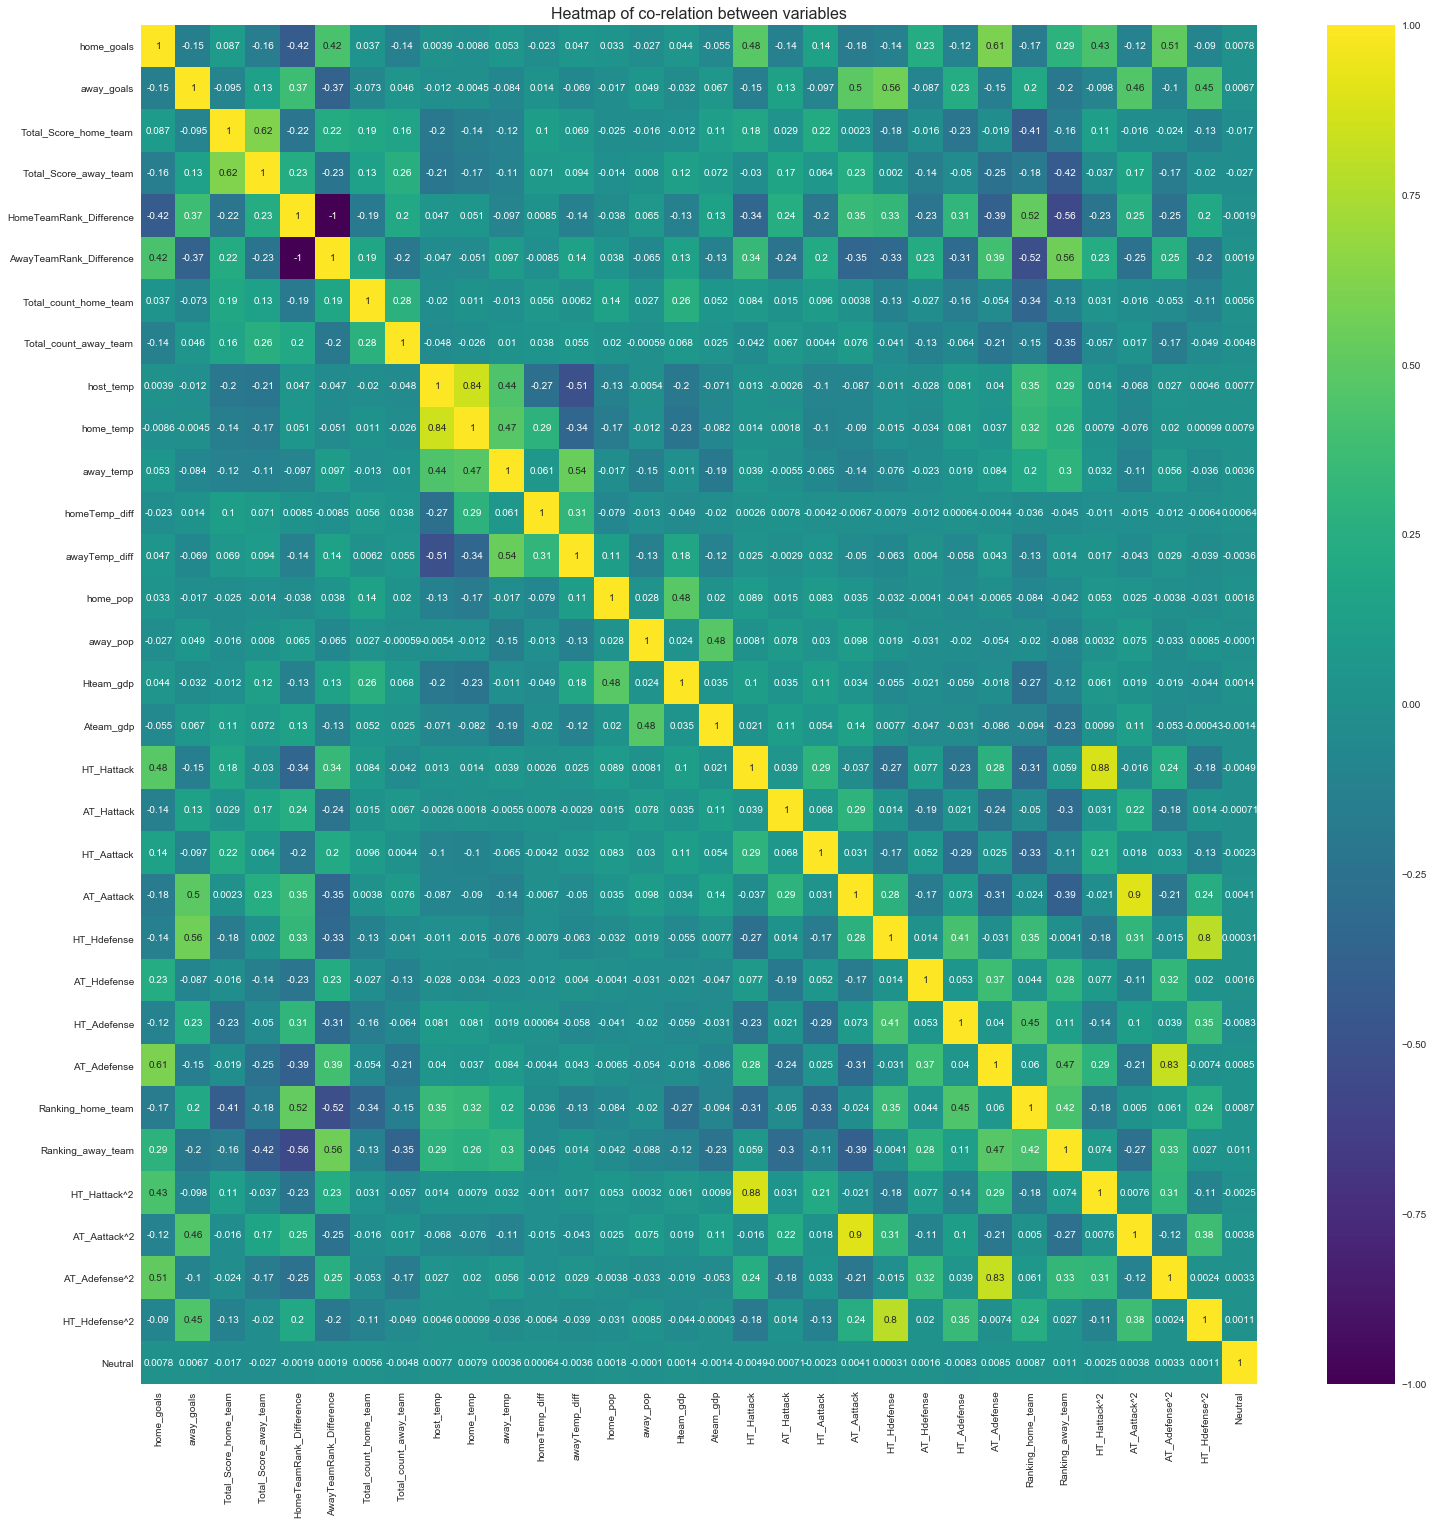

In [257]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(X_std.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [300]:
X = X_std[['HomeTeamRank_Difference', 'Total_Score_home_team', 'Total_Score_away_team','home_temp', 'away_temp',
         'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp',
       'HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense','HT_Hattack^2','AT_Aattack^2','AT_Adefense^2','HT_Hdefense^2','Neutral'
       ]]
#, 'HT_Hdefense','AT_Adefense'
#'HT_Hattack', 'AT_Aattack'
#'AwayTeamRank_Difference',
#'Total_Score_home_team', 'Total_Score_away_team',
#'Total_count_home_team', 'Total_count_away_team',
#'Ranking_home_team', 'Ranking_away_team',
#'HT_Hattack^2','AT_Aattack^2','AT_Adefense^2','HT_Hdefense^2'
#'home_temp', 'away_temp',
#'homeTemp_diff','awayTemp_diff',
y = df2['TeamWon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

lm.score(X_test, y_test)

0.6415219189412737

In [301]:
# Perform 6-fold cross validation
scores = cross_val_score(lm,X,y, cv=6)
print ("Cross-validated scores:", scores)


Cross-validated scores: [0.62757943 0.62823452 0.62921716 0.63445791 0.62757943 0.62790698]


In [235]:
# Make cross validated predictions
predictions = cross_val_predict(lm,X,y, cv=6)

In [236]:
accuracy = metrics.accuracy_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.6281253411944535


In [230]:
print(metrics.classification_report(y, predictions) )

              precision    recall  f1-score   support

          -1       0.60      0.65      0.62      4904
           0       0.46      0.14      0.21      4597
           1       0.66      0.87      0.75      8817

    accuracy                           0.63     18318
   macro avg       0.57      0.55      0.53     18318
weighted avg       0.59      0.63      0.58     18318



In [ ]:
proba = cross_val_predict(lm, X, y, cv=cv, method='predict_proba')